# Hipótese: Pedidos em uma categoria levam a pedidos da mesma categoria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Carregamento dos dados

In [2]:
all_orders = pd.read_csv("../datasets/trusted/all_orders.csv", index_col=0)
all_orders.count()

order_id                         99441
customer_unique_id               99441
customer_city                    99441
customer_state                   99441
order_approved_at                99281
order_purchase_timestamp         99441
order_estimated_delivery_date    99441
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
dtype: int64

In [3]:
more_than_once = pd.read_csv("../datasets/trusted/more_than_once.csv", index_col=0)
more_than_once.count()

order_id                         2997
customer_unique_id               2997
customer_city                    2997
customer_state                   2997
order_approved_at                2992
order_purchase_timestamp         2997
order_estimated_delivery_date    2997
order_delivered_carrier_date     2953
order_delivered_customer_date    2917
dtype: int64

In [4]:
products = pd.read_csv('../datasets/trusted/sold_products.csv', index_col=0)
products.count()

product_id                       104881
order_id                         104881
price                            104881
freight_value                    104881
order_purchase_timestamp         104881
order_estimated_delivery_date    104881
order_delivered_carrier_date     104881
order_delivered_customer_date    104881
product_category_name            104881
product_name_lenght              104881
product_description_lenght       104881
product_photos_qty               104881
product_weight_g                 104881
product_length_cm                104881
product_height_cm                104881
product_width_cm                 104881
dtype: int64

## Análise por categoria

In [5]:
categories = sorted(products['product_category_name'].unique())
print(''.join(map(lambda c: c.ljust(60), categories)))

agro_industria_e_comercio                                   alimentos                                                   alimentos_bebidas                                           artes                                                       artes_e_artesanato                                          artigos_de_festas                                           artigos_de_natal                                            audio                                                       automotivo                                                  bebes                                                       bebidas                                                     beleza_saude                                                brinquedos                                                  cama_mesa_banho                                             casa_conforto                                               casa_conforto_2                                             casa_construcao                         

In [6]:
sales = pd.merge(
    products[['order_id', 'product_id', 'product_category_name']],
    all_orders[['order_id', 'customer_unique_id']],
    on='order_id'
)
sales.count()

order_id                 104881
product_id               104881
product_category_name    104881
customer_unique_id       104881
dtype: int64

In [7]:
columns = ['customer_unique_id', 'order_id', 'product_category_name']
orders_by_category = pd.merge(all_orders, products, on='order_id')[columns]
orders_by_category.head()

,customer_unique_id,order_id,product_category_name
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,utilidades_domesticas
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,perfumaria
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,automotivo
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,pet_shop
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,papelaria


In [8]:
n_orders_by_category = orders_by_category.groupby(["customer_unique_id", "product_category_name"]).agg("count")
n_orders_by_category.sort_values(by='order_id', ascending=False).head()

,,order_id
customer_unique_id,product_category_name,
c8460e4251689ba205045f3ea17884a1,telefonia,24
4546caea018ad8c692964e3382debd19,beleza_saude,21
c402f431464c72e27330a67f7b94d4fb,informatica_acessorios,20
698e1cf81d01a3d389d96145f7fa6df8,automotivo,20
0f5ac8d5c31de21d2f25e24be15bbffb,moveis_decoracao,18


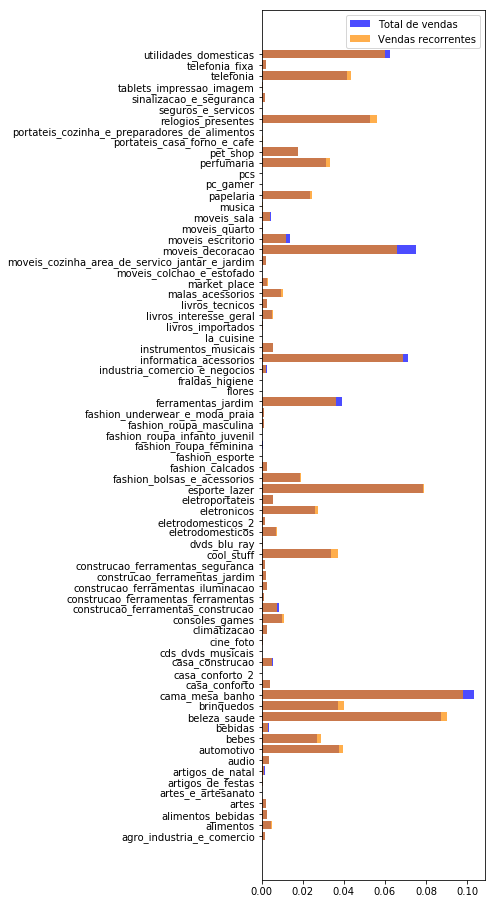

In [9]:
sales_by_category = orders_by_category.groupby('product_category_name').agg('count')['customer_unique_id']
sales_distribution = (sales_by_category / sales_by_category.sum()).sort_index()

recurrence_by_category = n_orders_by_category.groupby(["product_category_name"]).agg("count")['order_id']
recurrence_distribution = (recurrence_by_category / recurrence_by_category.sum()).sort_index()

plt.figure(figsize=(4, 16))
plt.barh(categories, sales_distribution, alpha=0.7, color="blue")
plt.barh(categories, recurrence_distribution, alpha=0.7, color="darkorange")
plt.legend(['Total de vendas', 'Vendas recorrentes'])
plt.show()

In [10]:
print(stats.kruskal(recurrence_distribution, sales_distribution).pvalue * 100, '%', sep='')

96.72192613145046%


O teste de kruskal aponta um _pvalue_ de 96.7%, indicando que quase com certeza a distribuição de recorrência dentro das categorias segue a mesma distribuição das vendas por categoria.

Isso aponta que, se existe relação entre comprar produtos de uma categoria e comprar produtos da mesma categoria posteriormente, essa relação deve ser proporcional à quantidade de compras total da categoria.

## Comparação recorrência dentro da categoria -> categoria a categoria

In [11]:
category_sales_table = pd.read_csv("./category_sales_table.csv", index_col=0)
category_sales_table

,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
agro_industria_e_comercio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
alimentos,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
alimentos_bebidas,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,4
artes,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
artes_e_artesanato,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artigos_de_festas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artigos_de_natal,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
audio,0,1,0,0,0,0,1,0,0,0,...,1,0,0,7,0,0,0,1,0,0
automotivo,0,0,1,0,0,0,1,0,0,4,...,4,0,0,5,0,1,1,9,0,4
bebes,0,0,0,0,0,0,0,0,4,0,...,1,0,0,3,0,1,1,3,0,14


In [12]:
recurrence_rates = pd.DataFrame(index=categories, columns=categories).fillna(0)

for c1 in categories:
    category_sales_table.loc[c1, c1] = recurrence_by_category.loc[c1]
    recurrence_rates.loc[c1, :] = category_sales_table.loc[c1, :] / category_sales_table[c1].sum()
    
recurrence_rates = recurrence_rates.fillna(0)

diag = np.diag(recurrence_rates)
m = diag.min()
M = diag.mean()
one_letter_variable = diag.std() / M

print('Valores de "autorecorrência":')
print("Min:\t", m * 100, '%', ' (', categories[diag.argmin()], ')', sep='')
print("Mean:\t", M * 100, '%', sep='')
print("Std:\t", one_letter_variable * 100, '%', sep='')

Valores de "autorecorrência":
Min:	68.42105263157895% (la_cuisine)
Mean:	92.88190188952494%
Std:	6.421968979167185%


Os valores acima se referem as recorrências de uma categoria a ela mesma. Desse modo, percebemos que a menor das "autorecorrências" é de 68%, da categoria *la_cuisine*, o que indica que, em todas as categorias, a maior parte das compras recorrentes já provinham da mesma.

Olhando a média e o desvio padrão, observa-se que a maior parte das categorias têm mais que 85% de recorrência de compras dentro da mesma categoria, ao invés de em categorias diferentes.